# Algoritmos populares de agrupación no supervisada

## Algoritmos de clustering

En el Aprendizaje Automático, los tipos de Aprendizaje pueden clasificarse a grandes rasgos en tres tipos:
- Aprendizaje Supervisado,
- Aprendizaje no supervisado y
- Aprendizaje Semisupervisado.

Los algoritmos que pertenecen a la familia del Aprendizaje No Supervisado no tienen ninguna variable a predecir ligada a los datos. En lugar de tener una salida, los datos sólo tienen una entrada que serían múltiples variables que describen los datos. Aquí es donde entra el clustering.

El clustering es la tarea de agrupar un conjunto de objetos de manera que los objetos del mismo cluster sean más similares entre sí que a los objetos de otros clusters. La similitud es una métrica que refleja la fuerza de la relación entre dos objetos de datos. El clustering se utiliza principalmente para la minería de datos exploratoria. Se utiliza en muchos campos, como el aprendizaje automático, el reconocimiento de patrones, el análisis de imágenes, la recuperación de información, la bioinformática, la compresión de datos y los gráficos por ordenador.

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

Vamos a ver varios de estos métodos a continuación paso a paso y de manera simple por ahora. Lo primero que hicimos fue cargar los módulos importantes como siempre lo hacemos cuando trabajamos con Python. Adicionalmnete vamos a trabajar con un conjunto de datos para todas nuestras pruebas.

Aquí la parte importante es que empezaremos a trabajar con machine Learning Algorithms por lo tanto la librería indispensable acá será la de `SKLEARN`  que es la librería de Machine Learning empotrada en Python.

Vamos a cargar un conjunto de datos de prueba para nuestro aprendizaje. (https://www.kaggle.com/datasets/shwetabh123/mall-customers)

**Acerca de este archivo**

Este fichero contiene la información básica (DNI, edad, sexo, ingresos, puntuación del gasto) de los clientes 

In [2]:
data=pd.read_csv("../Datas/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
## Algunos estadísticos descriptivos..
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### K-Means

Existen muchos modelos de clustering. Vamos a repasar los más populares. A pesar de su simplicidad, el K-Means es ampliamente utilizado para el clustering en muchas aplicaciones de ciencia de datos, especialmente útil si usted necesita descubrir rápidamente ideas de datos no etiquetados. En este cuaderno, veremos cómo utilizar k-Means para la segmentación de clientes.

In [6]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

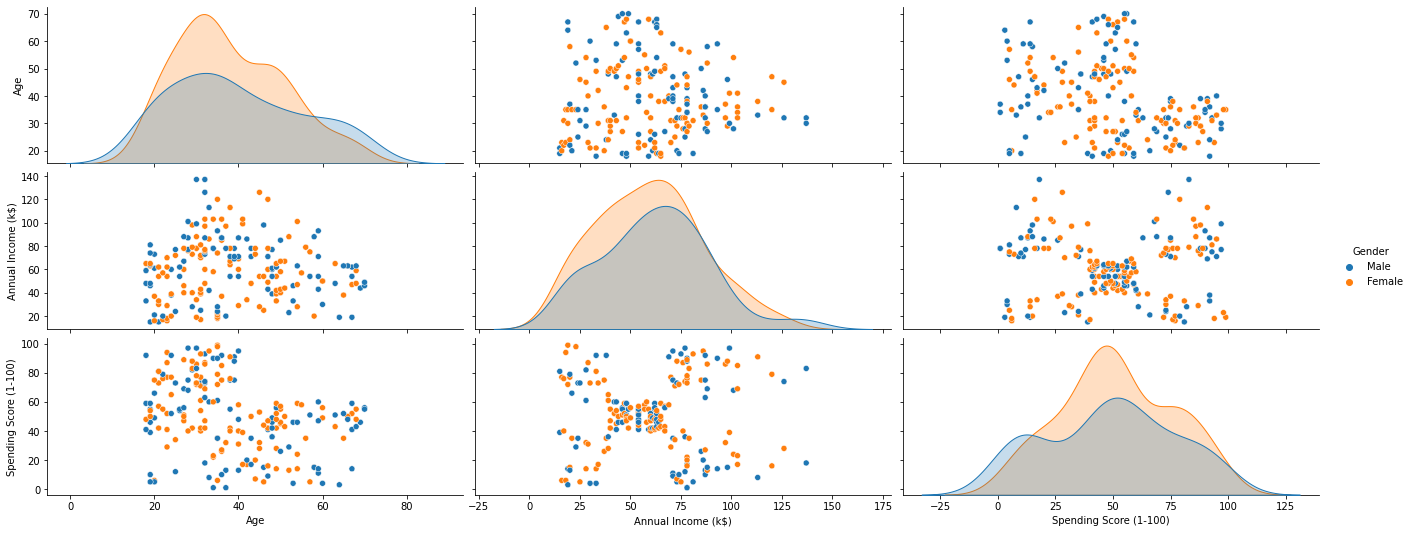

In [7]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=2.5)
plt.show()

De la gráfica anterior vemos que el género no tiene relación directa con la segmentación de las variables. Por eso podemos descartarlo y seguir con otras características, por lo que a partir de ahora utilizaremos el parámetro X.

In [8]:
X = data.drop(['CustomerID','Gender'], axis=1)
X0=X.copy()

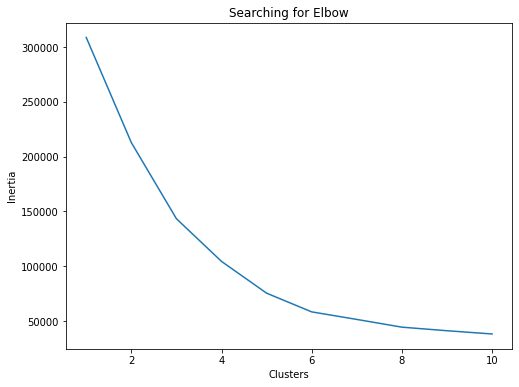

In [9]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

El método del codo nos dice que debemos seleccionar el cluster cuando hay un cambio significativo en la inercia. Como podemos ver en el gráfico, podemos decir que esto puede ser 3 o 4. Veamos ambos resultados en el gráfico y decidamos.

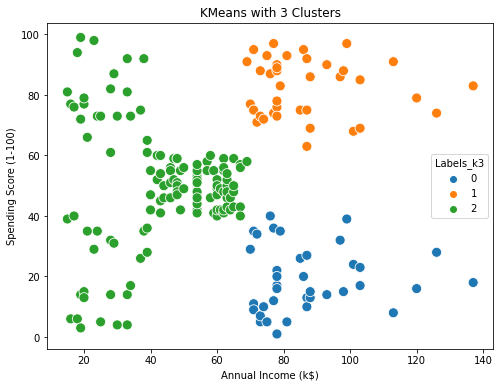

In [10]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X0)
X['Labels_k3'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k3'], palette=sns.color_palette('tab10', 3), s=100)
plt.title('KMeans with 3 Clusters')
plt.show()

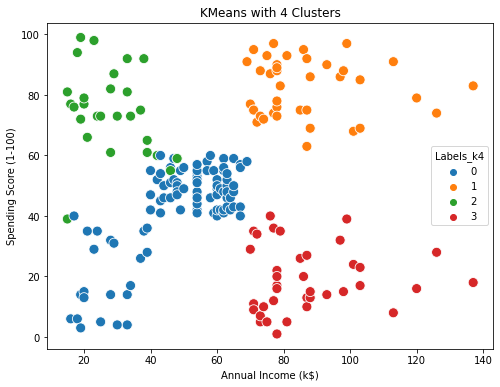

In [11]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(X0)
X['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.show()

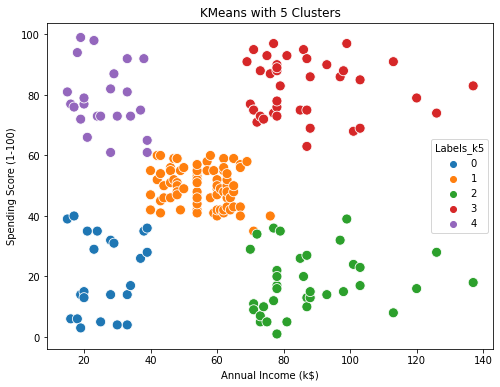

In [12]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(X0)
X['Labels_k5'] = km5.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

Juntemos todo en un solo plot para tener mayor claridad de todo el panorama...

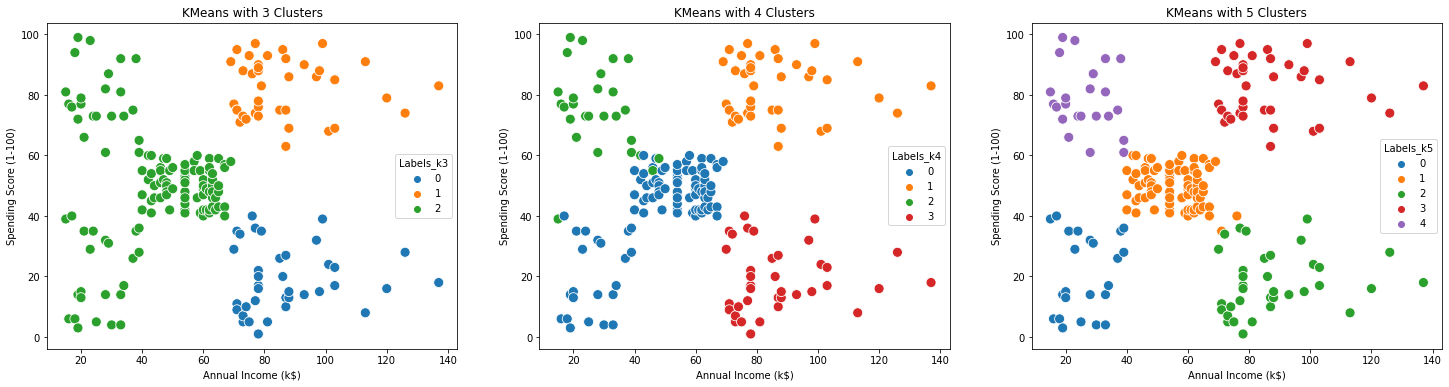

In [13]:
plt.figure(figsize=(25, 6))
plt.subplot(131)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k3'], palette=sns.color_palette('tab10', 3), s=100)
plt.title('KMeans with 3 Clusters')
plt.subplot(132)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.subplot(133)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

A juzgar por los gráficos podríamos decir que el cluster 5 parece mejor que el 4 y mucho mejor que el 3. Como se trata de un problema no supervisado, no podemos saber con seguridad cuál es el mejor en la vida real, pero observando los datos podemos decir que el 5 sería nuestra elección.

Ahora podemos analizar nuestros 5 clusters en detalle:
- La etiqueta 0 es de bajos ingresos y bajos gastos
- La etiqueta 1 es de ingresos altos y gastos elevados
- La etiqueta 2 es de ingresos medios y gastos medios
- La etiqueta 3 corresponde a una renta alta y un gasto bajo
- La etiqueta 4 es de ingresos bajos y gastos elevados

También vamos a verlos más claramente con swarmplot:

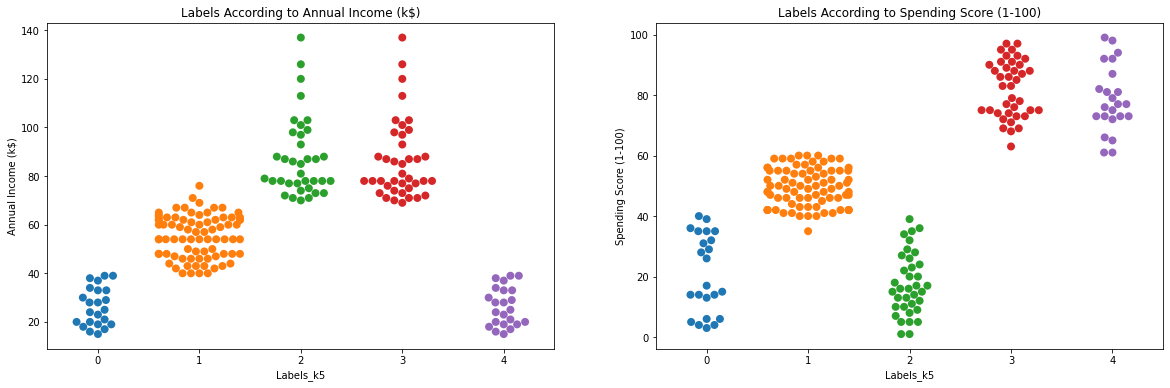

In [14]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels_k5', y='Annual Income (k$)', data=X, ax=ax , s=8)
ax.set_title('Labels According to Annual Income (k$)')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels_k5', y='Spending Score (1-100)', data=X, ax=ax , s=8)
ax.set_title('Labels According to Spending Score (1-100)')

plt.show()

Estos diagramas de espigas son como los diagramas de dispersión solo que tienen un algoritmo diseñado para no apilar los datos unos encimas de otros sino distribuirlos de tal manera que no se solapen.

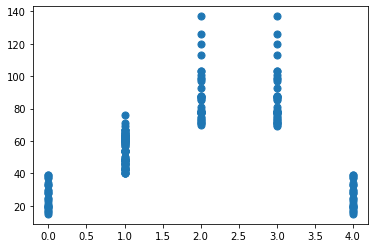

In [15]:
plt.scatter(X["Labels_k5"],X["Annual Income (k$)"], s=50)
plt.show()

### Clustering Jerárquico (Aglomerativo)

Vamos a estudiar una técnica de clustering, que es el Clustering Jerárquico Aglomerativo. El aglomerativo es el enfoque de abajo hacia arriba que es más popular que el clustering divisivo. También utilizaremos la vinculación completa como criterio de vinculación. La clase de Clustering Aglomerativo requerirá dos entradas:

- n_clusters: The number of clusters to form as well as the number of centroids to generate.
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
- Value will be: 'complete'
- Note: It is recommended that try everything with 'average' as well

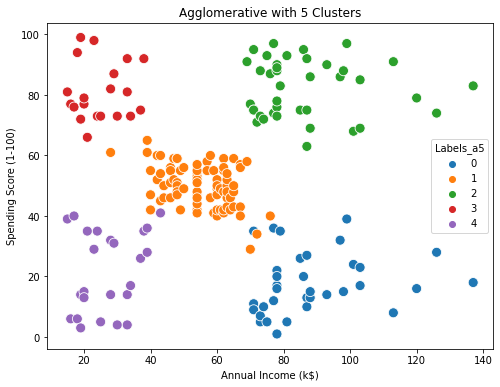

In [16]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X0)

X['Labels_a5'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_a5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('Agglomerative with 5 Clusters')
plt.show()

#### Dendrograma asociado a la agrupación jerárquica aglomerativa

Recuerde que una matriz de distancia contiene la distancia de cada punto a todos los demás puntos de un conjunto de datos. Podemos utilizar la función matriz_distancia, que requiere dos entradas. Recuerde que los valores de la distancia son simétricos, con una diagonal de 0's. Esta es una forma de asegurarse de que su matriz es correcta. 

In [17]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X0, X0)
print(dist)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


Usando la clase de enlace de la jerarquía, pase los parámetros:

- La matriz de distancia
- 'completa' para el enlace completo

In [18]:
Z = hierarchy.linkage(dist, 'complete')

Un clustering jerárquico se visualiza típicamente como un dendrograma, como se muestra en la siguiente celda. Cada fusión está representada por una línea horizontal. La coordenada y de la línea horizontal es la similitud de los dos clusters que se fusionaron, donde las ciudades se ven como clusters únicos. Subiendo desde la capa inferior hasta el nodo superior, un dendrograma nos permite reconstruir la historia de las fusiones que dieron lugar a la agrupación representada.

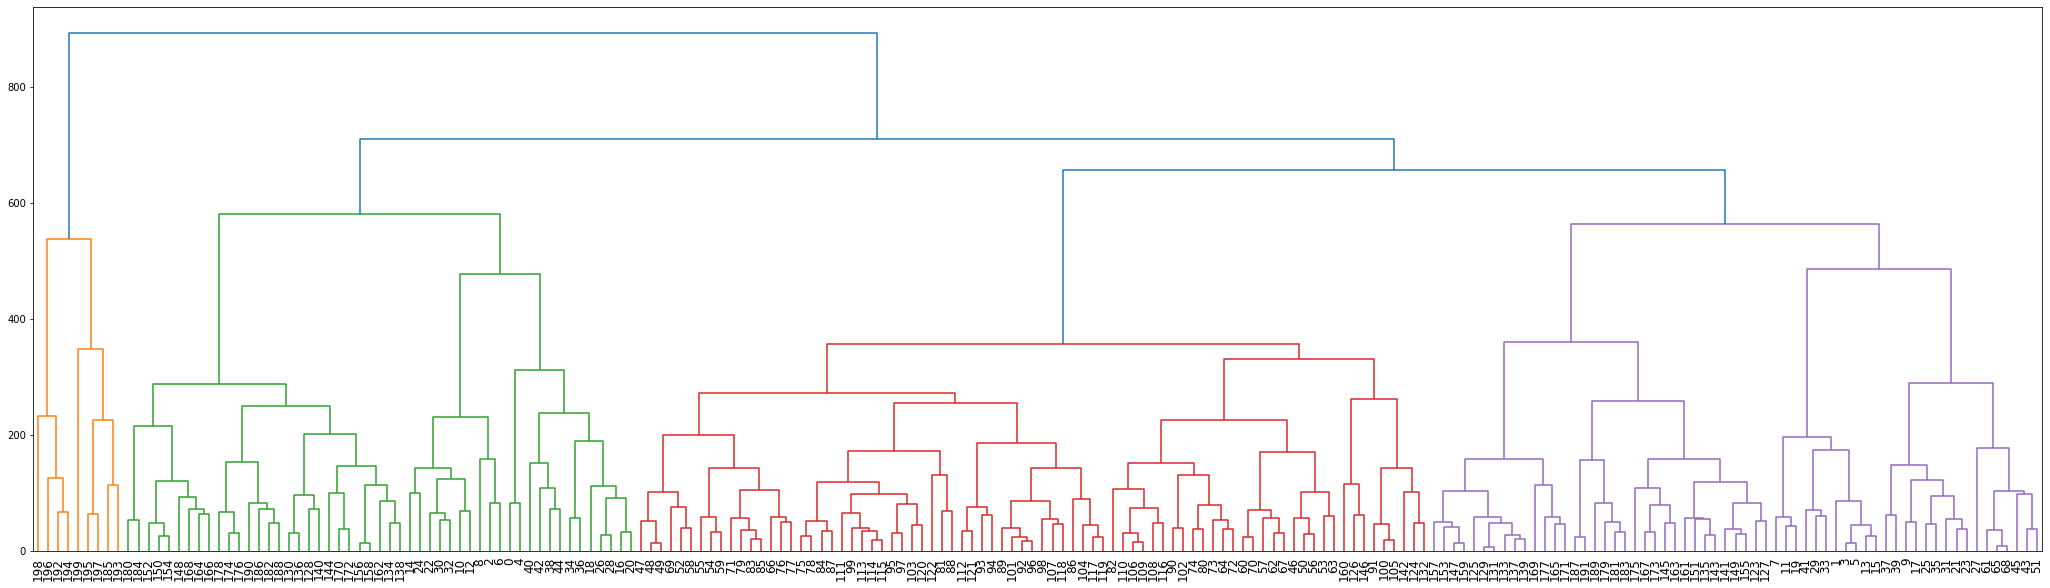

In [19]:
plt.figure(figsize=(36, 10))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=12, orientation='top')

Hemos utilizado la vinculación completa para nuestro caso, cambiémosla por la vinculación media para ver cómo cambia el dendograma.

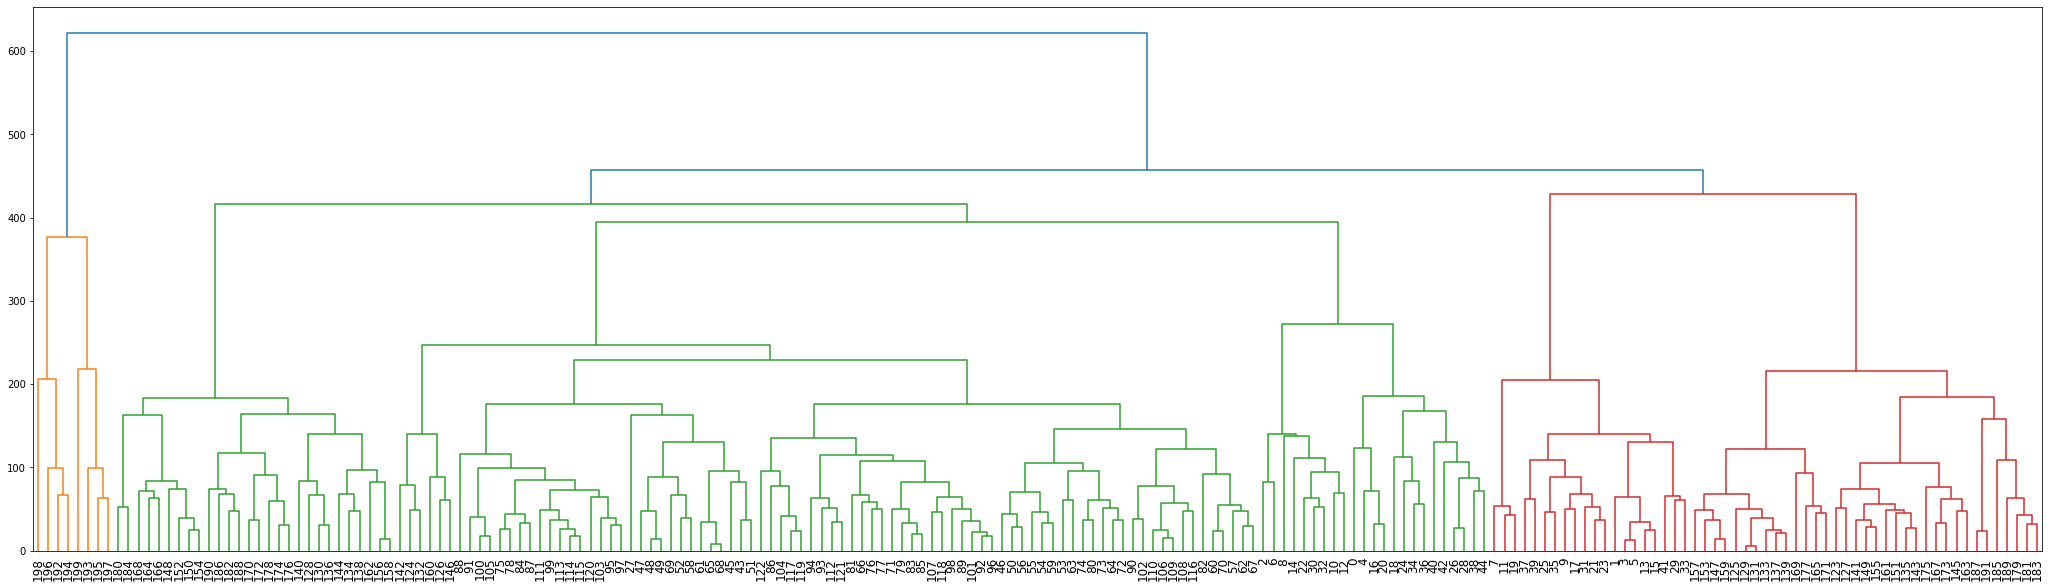

In [20]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(36, 10))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size =12, orientation = 'top')

### Clustering basado en la densidad (DBSCAN)

La mayoría de las técnicas tradicionales de clustering, como k-means, clustering jerárquico y difuso, pueden utilizarse para agrupar datos sin supervisión.

Sin embargo, cuando se aplican a tareas con clústeres de forma arbitraria, o clústeres dentro de un clúster, las técnicas tradicionales pueden ser incapaces de conseguir buenos resultados. Es decir, los elementos de un mismo clúster podrían no compartir suficiente similitud o el rendimiento podría ser pobre. Además, la agrupación basada en la densidad localiza regiones de alta densidad que están separadas entre sí por regiones de baja densidad. La densidad, en este contexto, se define como el número de puntos en un radio determinado.

En esta parte, el enfoque principal será la manipulación de los datos y las propiedades de DBSCAN y la observación de la agrupación resultante.

#### Modelado

DBSCAN son las siglas de Density-Based Spatial Clustering of Applications with Noise. Esta técnica es uno de los algoritmos de clustering más comunes que funciona en base a la densidad del objeto. La idea es que si un punto concreto pertenece a un cluster, debe estar cerca de muchos otros puntos de ese cluster.

Funciona en base a dos parámetros: Epsilon y Puntos Mínimos Epsilon determina un radio específico que si incluye un número suficiente de puntos dentro, lo llamamos área densa mínimaMuestras determina el número mínimo de puntos de datos que queremos en una vecindad para definir un cluster.


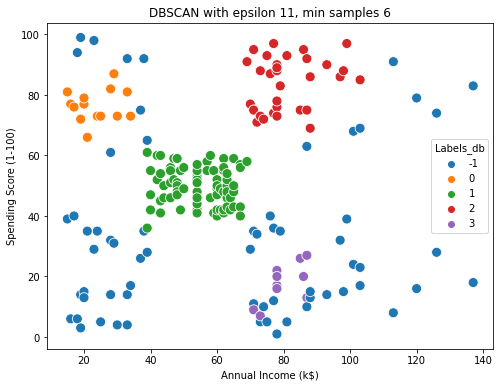

In [21]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X0)

X['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Como podemos ver, DBSCAN no funciona muy bien porque la densidad de nuestros datos no es tan fuerte. La etiqueta -1 significa valores atípicos, por lo que aparecerá la mayoría como valores atípicos. Podríamos haber obtenido mejores resultados si hubiéramos tenido datos más grandes.

### Algoritmo Mean Shift

El clustering MeanShift tiene como objetivo descubrir manchas en una densidad suave de muestras. Se trata de un algoritmo basado en el centroide, que funciona actualizando los candidatos a centroides para que sean la media de los puntos de una región determinada. Estos candidatos se filtran en una etapa de posprocesamiento para eliminar los casi duplicados y formar el conjunto final de centroides.

El algoritmo establece automáticamente el número de clusters, en lugar de depender de un parámetro de ancho de banda, que dicta el tamaño de la región a buscar. Este parámetro puede establecerse manualmente, pero también puede estimarse mediante la función estimate_bandwidth proporcionada, que se llama si no se establece el ancho de banda.

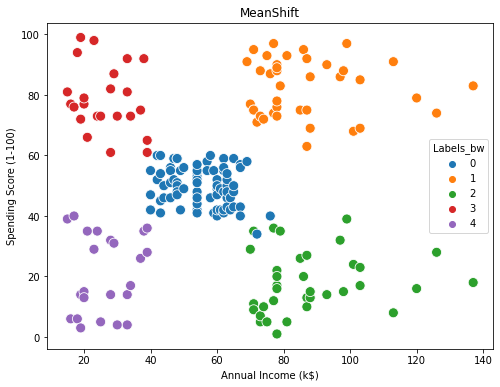

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X0)

X['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()

### Resumen de todo en un solo lugar

Visualicemos todos los algoritmos que hemos utilizado hasta ahora y veamos sus distribuciones de clustering.

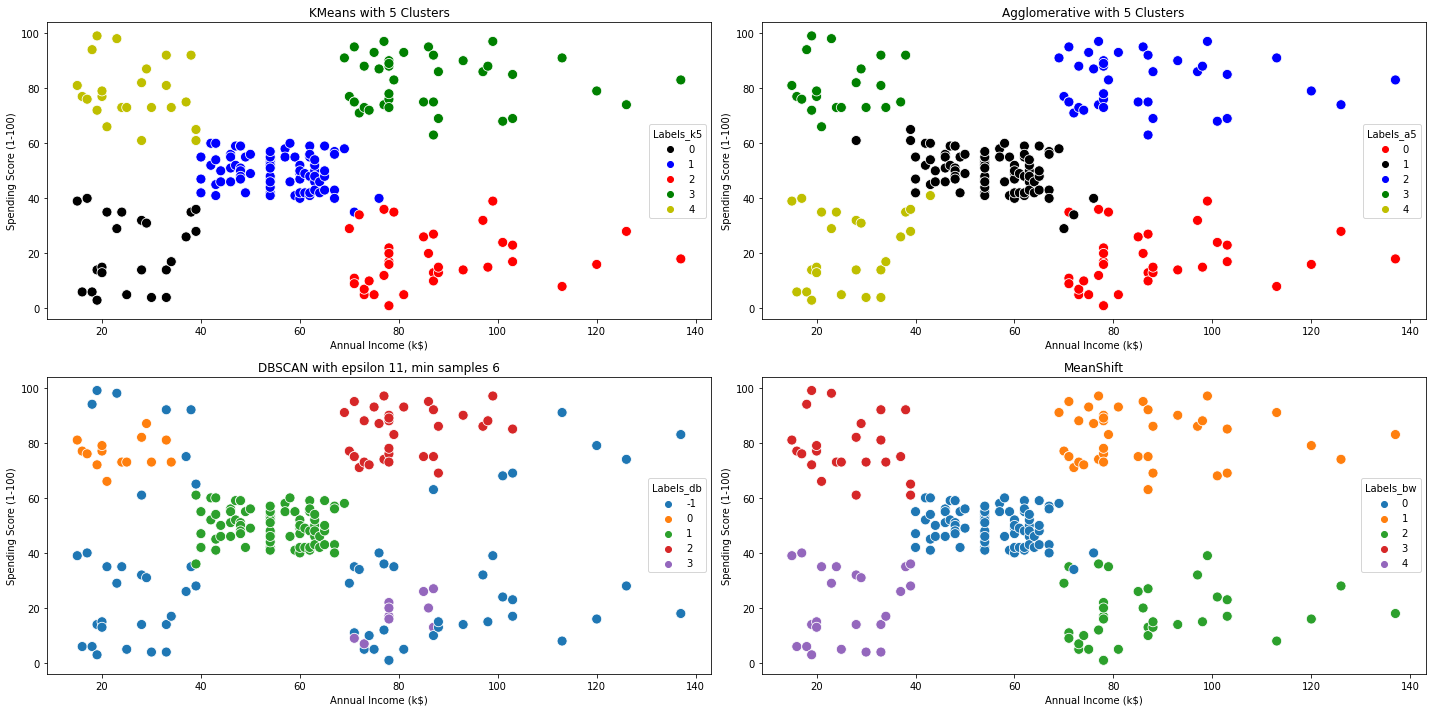

In [23]:
fig = plt.figure(figsize=(20,10))

##### KMeans #####
ax = fig.add_subplot(221)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_k5'], palette=["k","b","r","g","y"], s=100)#sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')

##### Agglomerative Clustering #####
ax = fig.add_subplot(222)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_a5'], palette=["r","k","b","g","y"], s=100)#sns.color_palette('tab10', 5), s=100)
plt.title('Agglomerative with 5 Clusters')

##### DBSCAN #####
ax = fig.add_subplot(223)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')

##### MEAN SHIFT #####
ax = fig.add_subplot(224)
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')

plt.tight_layout()
plt.show()

Así quedó nuestro dataset X:

In [24]:
X

,Age,Annual Income (k$),Spending Score (1-100),Labels_k3,Labels_k4,Labels_k5,Labels_a5,Labels_db,Labels_bw
0,19,15,39,2,2,0,4,-1,4
1,21,15,81,2,2,4,3,0,3
2,20,16,6,2,0,0,4,-1,4
3,23,16,77,2,2,4,3,0,3
4,31,17,40,2,0,0,4,-1,4
...,...,...,...,...,...,...,...,...,...
195,35,120,79,1,1,3,2,-1,1
196,45,126,28,0,3,2,0,-1,2
197,32,126,74,1,1,3,2,-1,1
198,32,137,18,0,3,2,0,-1,2


Así está nuestro dataset original X0:

In [25]:
X0

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


No todos los algoritmos de agrupamiento parece que sieron los mismos resultados, de hecho tenemos diferentes resultados pero en la mayoría de los casos parece que coinciden bastante bien... Así son los algoritmos, algunos sirven, otros no tanto, algunos hay que ajustarlos y ajustar los parámetros para que las cosas funcionen. **Ahí está la tarea del investigador y del científico de datos**. 